# 02_eda
Placeholder notebook created by script.

Load Cleaned Data

Performed exploratory data analysis to uncover sales trends, regional performance, category-wise contribution, and the impact of discounting on profitability using Matplotlib and Seaborn.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed_sales_data.csv")
df['Order Date'] = pd.to_datetime(df['Order Date'])


Showing dataset

In [15]:
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [17]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

Overall Business KPIs

In [10]:
Total_Sales = df['Sales'].sum()
Total_Profit = df['Profit'].sum()
Total_Orders = df['Order ID'].nunique()

print("Total Sales:", Total_Sales )
print("Total Profit:", Total_Profit )
print("Total Orders:", Total_Orders)


Total Sales: 12642501.90988
Total Profit: 1467457.29128
Total Orders: 25035


Sales Trend Over Time

C:\Users\HP\AppData\Local\Temp\ipykernel_21156\4188016282.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['Sales']


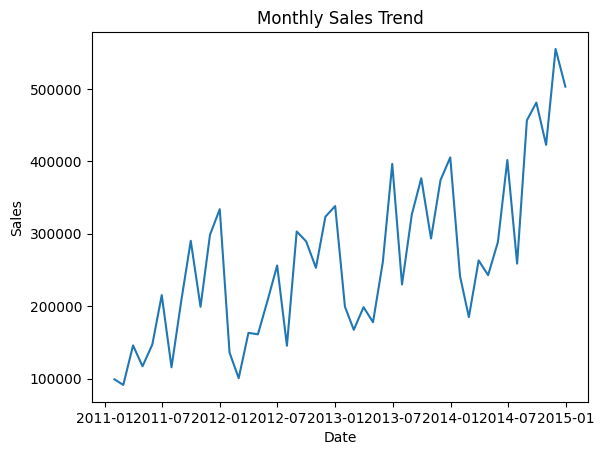

In [11]:
monthly_sales = (
    df.set_index('Order Date')
      .resample('M')['Sales']
      .sum()
      .reset_index()
)

plt.figure()
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'])
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


Sales by Region

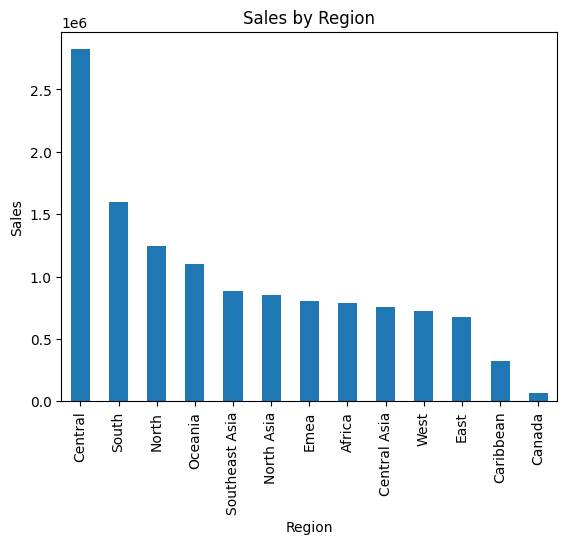

In [18]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure()
region_sales.plot(kind='bar')
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()


Category & Sub-Category Analysis

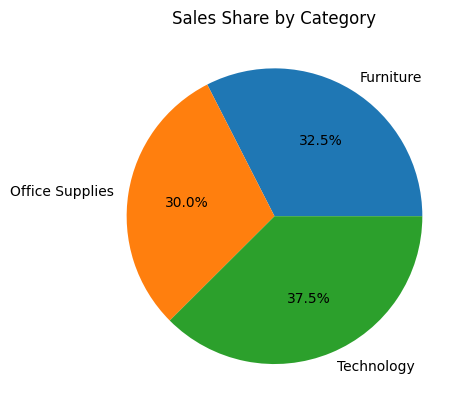

In [19]:
category_sales = df.groupby('Category')['Sales'].sum()

plt.figure()
category_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title("Sales Share by Category")
plt.ylabel("")
plt.show()


Profit vs Discount

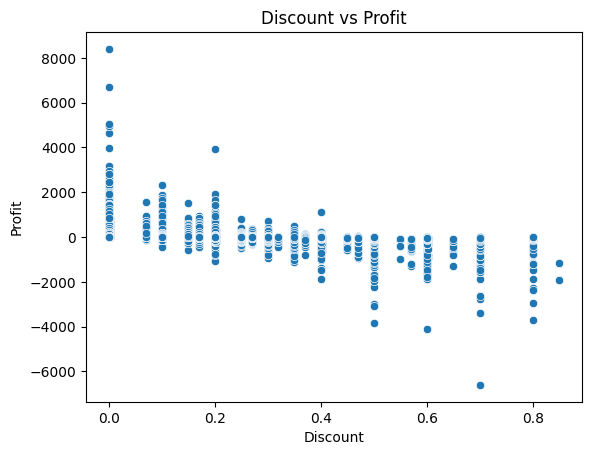

In [ ]:
plt.figure()
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title("Discount vs Profit")
plt.show()


Top 10 Products by Sales

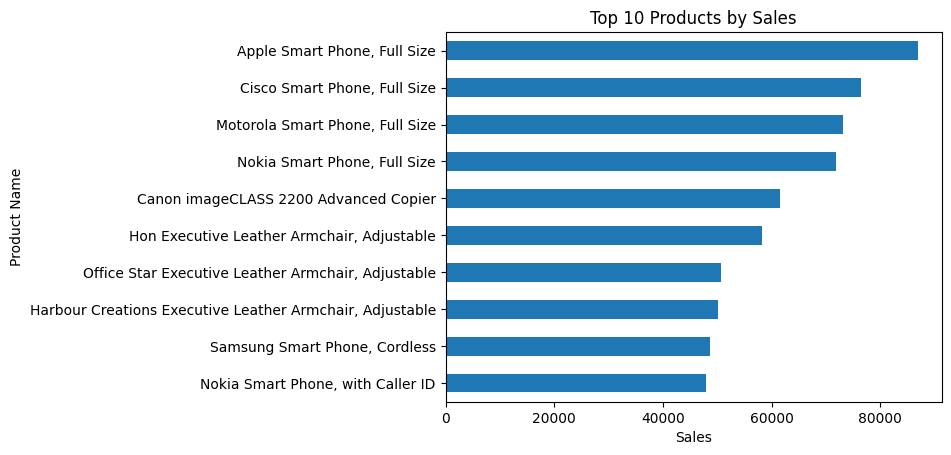

In [21]:
top_products = (
    df.groupby('Product Name')['Sales']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure()
top_products.plot(kind='barh')
plt.title("Top 10 Products by Sales")
plt.xlabel("Sales")
plt.gca().invert_yaxis()
plt.show()


Loss-Making Products

In [26]:
loss_products = (
    df.groupby('Product Name')['Profit']
      .sum()
      .sort_values()
      .head(10)
)

loss_products


Product Name
Cubify CubeX 3D Printer Double Head Print                  -8879.9704
Lexmark MX611dhe Monochrome Laser Printer                  -4589.9730
Motorola Smart Phone, Cordless                             -4447.0380
Cubify CubeX 3D Printer Triple Head Print                  -3839.9904
Bevis Round Table, Adjustable Height                       -3649.8940
Bevis Computer Table, Fully Assembled                      -3509.5638
Rogers Lockers, Blue                                       -2893.4908
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases   -2876.1156
Bevis Wood Table, with Bottom Storage                      -2782.5880
Lesro Training Table, Rectangular                          -2581.2834
Name: Profit, dtype: float64

<Axes: ylabel='Product Name'>

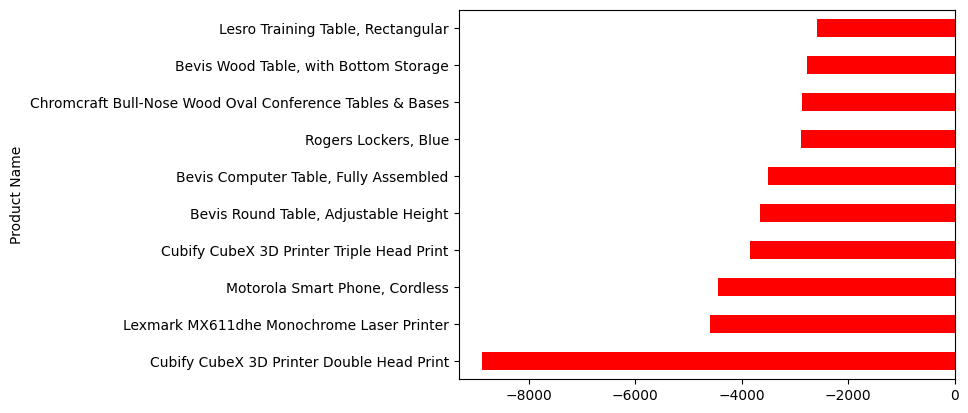

In [27]:
plt.figure()
loss_products.plot(kind='barh', color='red')

Save Aggregated Data 

In [28]:
monthly_sales.to_csv("../data/monthly_sales.csv", index=False)
region_sales.to_csv("../data/region_sales.csv")
